In [1]:
import pandas as pd

co2 = pd.read_csv("../../HumanImpact/emissions/data/v50_CO2_excl_short-cycle_org_C_2018.txt", delimiter=';')

print(co2)

          lat    lon    emission
0        88.1  -50.7     11.0301
1        88.1  -50.6     15.7066
2        88.1  -50.5     19.1943
3        88.1  -50.4     22.0621
4        88.1  -50.3     24.5536
...       ...    ...         ...
2191880 -77.8  166.5  11459.2000
2191881 -77.8  166.6    694.4980
2191882 -77.9  166.3   2133.1000
2191883 -77.9  166.4   1389.0000
2191884 -77.9  166.5   7887.5100

[2191885 rows x 3 columns]


In [2]:
co2 = co2.sort_values('emission', ascending=False)
print(co2[:10])

          lat    lon     emission
798909   41.0  122.5  355301000.0
1098659  31.2  121.3  330941000.0
1129717  30.1  115.0  209367000.0
1124042  30.3  114.1   82808100.0
407743   53.4   59.0   68397600.0
1282838  24.2  120.4   62984400.0
845540   39.5  116.2   57421000.0
337844   55.9   37.7   56890200.0
795787   41.1  123.4   55067700.0
1301463  23.4   86.3   50850200.0


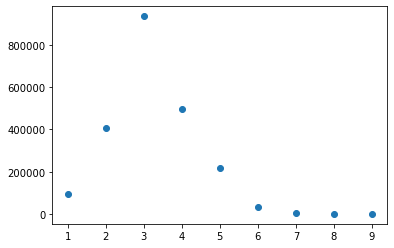

In [3]:
import matplotlib.pyplot as plt

co2['em_int'] = co2['emission'].astype(int).astype(str)
co2['em_str'] = co2['em_int'].str.len()
x = co2.em_str.value_counts()
plt.scatter(x.index, x.values)
plt.show()

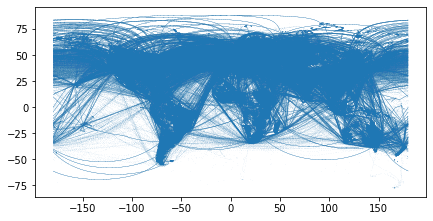

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05,  edgecolors='none')
plt.savefig(f"outputs/raw1.png", dpi=600, bbox_inches='tight')

plt.show()

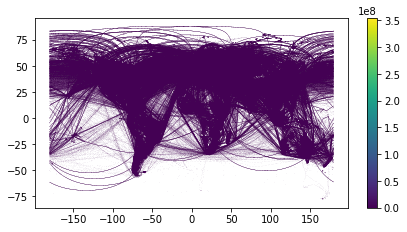

In [5]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], s=0.05, edgecolors='none', )
plt.colorbar(cols)
plt.savefig(f"outputs/raw2.png", dpi=600, bbox_inches='tight')

plt.show()

In [6]:
import numpy as np

print(co2.emission.value_counts())
print()
print("Min value: ", np.amin(co2.emission))
print("Max value: ", np.amax(co2.emission))

347.2490      30310
248.0350      27141
297.6420      22373
396.8560      17280
148.8210      17257
              ...  
42268.3000        1
42211.7000        1
40.8038           1
53.3637           1
4228.0900         1
Name: emission, Length: 1215854, dtype: int64

Min value:  8.016030000000001e-07
Max value:  355301000.0


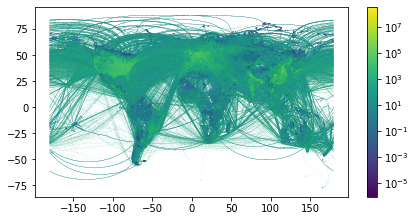

In [7]:
from matplotlib import colors

fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], norm=colors.LogNorm(), s=0.05, edgecolors='none', )
plt.colorbar(cols)
plt.savefig(f"outputs/raw3.png", dpi=600, bbox_inches='tight')

plt.show()

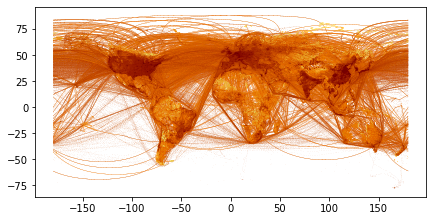

In [8]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05, edgecolors='none', c=co2['emission'], norm=colors.LogNorm(), cmap='afmhot_r')
plt.savefig(f"outputs/raw4.png", dpi=600, bbox_inches='tight')

plt.show()

In [9]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(co2['lon'], co2['lat'])]
geodata = gpd.GeoDataFrame(co2, crs="EPSG:4326", geometry=geometry)

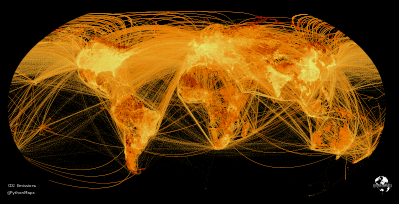

In [10]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')
fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap='afmhot', norm=colors.LogNorm(), s=0.05, edgecolors='none')
plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-8000000, 9000000)

logo = plt.imread('../../Branding/globe_black.png')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

plt.savefig(f"outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [11]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

our_cmap = cm.get_cmap('afmhot', 11)
newcolors = our_cmap(np.linspace(0, 1, 11))
newcolors = newcolors[1:]

black = np.array([0.0, 0.0, 0.0, 1.0])
#newcolors[:1, :] = black
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
[]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

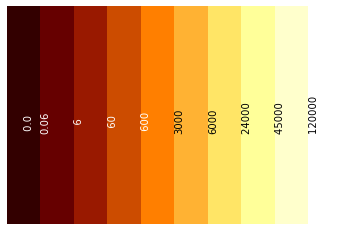

In [17]:
gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
plt.axis('off')
plt.text(0., 0.65, " 0.0", color='white', rotation='vertical',)
plt.text(0.5, 0.65, "0.06", color='white', rotation='vertical',)
plt.text(1.5, 0.65, "   6", color='white', rotation='vertical',)
plt.text(2.5, 0.65, "  60", color='white', rotation='vertical',)
plt.text(3.5, 0.65, " 600", color='white', rotation='vertical',)
plt.text(4.5, 0.65, "3000", color='black', rotation='vertical',)
plt.text(5.5, 0.65, "6000", color='black', rotation='vertical',)
plt.text(6.5, 0.65, "24000 ", color='black', rotation='vertical',)
plt.text(7.5, 0.65, "45000 ", color='black', rotation='vertical',)
plt.text(8.5, 0.65, "120000  ", color='black', rotation='vertical',)

#plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

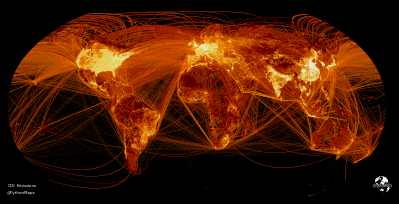

In [13]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)
plt.savefig(f"outputs/raw7.png", dpi=600, bbox_inches='tight')
plt.show()

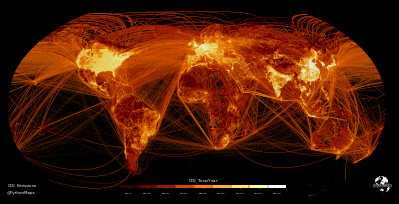

In [15]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)

fig = ax.get_figure()
cax = fig.add_axes([0.36, 0.16, 0.33, 0.01])
sm = plt.cm.ScalarMappable(cmap=our_cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, cax=cax, orientation="horizontal", pad=0.2, format='%.1e',
                  ticks=[0.03, 3, 33, 330, 1800, 4500, 15000, 34500, 82500],
                  drawedges=True)
cb.outline.set_visible(False)
#cb.outline.set_linewidth(0.00001)
#cb.outline.set_color('white')
cb.ax.tick_params(labelsize=2, width=0.5, length=0.5, color='white') 
cbytick_obj = plt.getp(cb.ax, 'xticklabels' ) #Set y tick label color
plt.setp(cbytick_obj, color='white')
cb.ax.set_xlabel('CO$_2$ Tons/Year', fontsize=4, color='white', labelpad=-16)


plt.savefig(f"outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()